### GOLF_GAMING DATASET 

To perform exploratory data analysis on the provided data and predict the "Play Golf" field in the last row of D17, we will perform the following steps:  

Import necessary libraries  
Load the data and view the top 5 rows  
Check for missing data and perform data cleaning if necessary  
Perform data visualization to gain insights about the data  
Split the data into training and test sets  
Create and train a model  
Make predictions on the test set and evaluate the model  
Improve the model  

Import all necessary libraries

In [15]:
# Import libraries
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib as mat
import matplotlib.pyplot as plt
import plotly.express as px
import warnings
warnings.filterwarnings("ignore")

In [18]:
#More libraries
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix

Step 2: Load the data and view the top 5 rows

In [5]:
# create dataframework for the dataset
golf_df = pd.read_csv("Golf_Gaming.csv")
golf_df

,Day,Outlook,Temperature,Humidity,Wind,Play Golf
0,D1,Sunny,Hot,High,Weak,No
1,D2,Sunny,Hot,High,Strong,No
2,D3,Overcast,Hot,High,Weak,Yes
3,D4,Rain,Mild,High,Weak,Yes
4,D5,Rain,Cool,Normal,Weak,Yes
5,D6,Rain,Cool,Normal,Strong,No
6,D7,Overcast,Cool,Normal,Strong,Yes
7,D8,Sunny,Mild,High,Weak,No
8,D9,Sunny,Cool,Normal,Weak,Yes
9,D10,Rain,Mild,Normal,Weak,Yes


Step 3: Check for missing data and perform data cleaning if necessary
I will check if there are any missing data and perform data cleaning if necessary.


In [6]:
golf_df.isnull().sum()

Day            0
Outlook        0
Temperature    0
Humidity       0
Wind           0
Play Golf      0
dtype: int64

There are no missing values, so we do not need to perform data cleaning.

Step 4: Perform data visualization to gain insights about the data

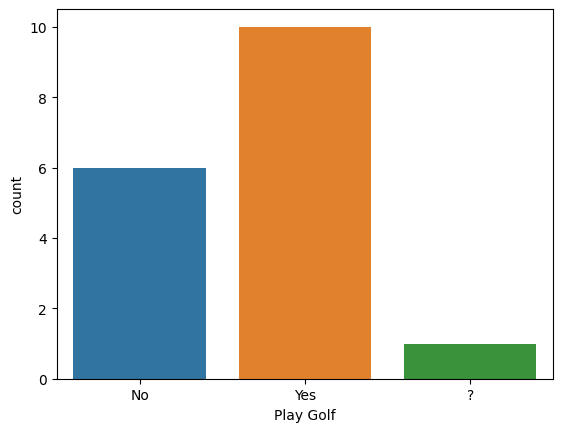

In [9]:
sns.countplot(x='Play Golf', data=golf_df)
plt.show()

From the above count plot, we can see that there are more "Yes" values than "No" values in the "Play Golf" column, meaning that the majority of the days the game of golf was played.


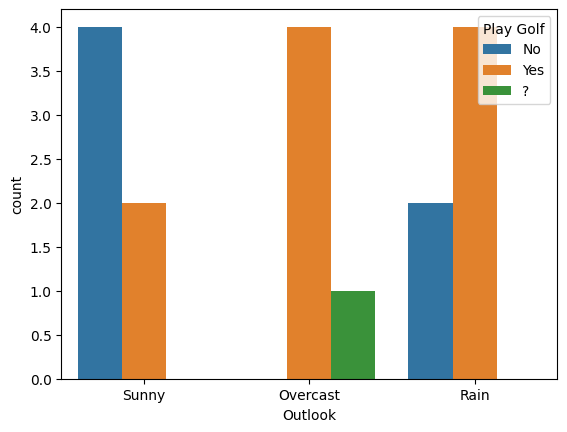

In [10]:
sns.countplot(x='Outlook', hue='Play Golf', data=golf_df)
plt.show()

From the above count plot, we can see that the highest number of "Yes" values occurred when the outlook was "Overcast". When the outlook was "Rain" there were more "Yes" values than "No" values, and when the outlook was "Sunny" there were more "No" values than "Yes" values.

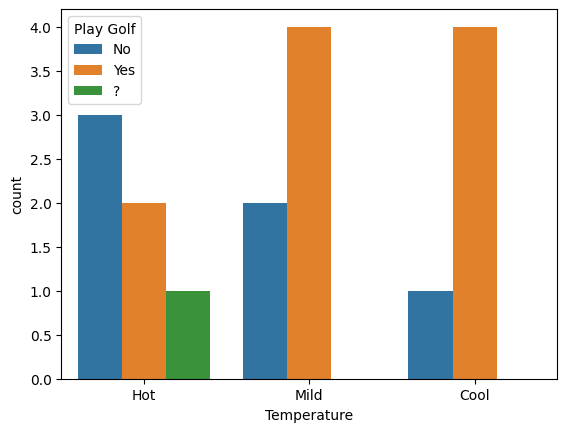

In [11]:
sns.countplot(x='Temperature', hue='Play Golf', data=golf_df)
plt.show()

From the above count plot, we can see that the highest number of "Yes" values occurred when the temperature was "Mild". When the temperature was "Cool" or "Hot" there were more "Yes" values than "No" values.


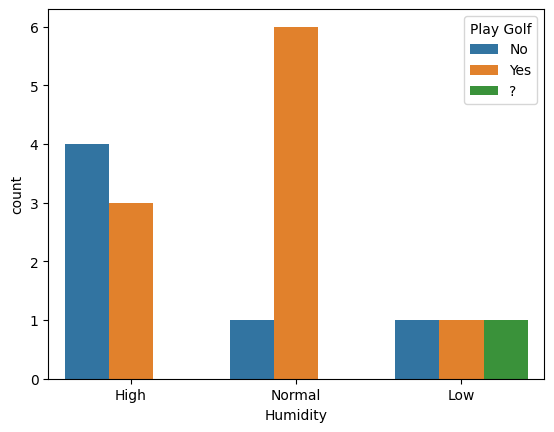

In [13]:
sns.countplot(x='Humidity', hue='Play Golf', data=golf_df)
plt.show()

#Splitting the dataset (to be reviewed)

In [19]:
# Split data into training and test sets
X = golf_df.drop(columns='Play Golf')
y = golf_df['Play Golf']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

#Creating the model (to be reviewed)

In [20]:
# Create the Decision Tree model
model = DecisionTreeClassifier()

In [22]:
# Drop other variables
golf_df = golf_df.drop(columns=['Outlook', 'Temperature', 'Humidity'])
golf_df

,Day,Wind,Play Golf
0,D1,Weak,No
1,D2,Strong,No
2,D3,Weak,Yes
3,D4,Weak,Yes
4,D5,Weak,Yes
5,D6,Strong,No
6,D7,Strong,Yes
7,D8,Weak,No
8,D9,Weak,Yes
9,D10,Weak,Yes


Further cleaning.

In [23]:
# Drop last last row since it has null values 
golf_df = golf_df.drop([16])
golf_df

,Day,Wind,Play Golf
0,D1,Weak,No
1,D2,Strong,No
2,D3,Weak,Yes
3,D4,Weak,Yes
4,D5,Weak,Yes
5,D6,Strong,No
6,D7,Strong,Yes
7,D8,Weak,No
8,D9,Weak,Yes
9,D10,Weak,Yes


In [24]:
# make Day Column continuous by removing first character
golf_df['Day'] = golf_df['Day'].str[1:]
golf_df

,Day,Wind,Play Golf
0,1,Weak,No
1,2,Strong,No
2,3,Weak,Yes
3,4,Weak,Yes
4,5,Weak,Yes
5,6,Strong,No
6,7,Strong,Yes
7,8,Weak,No
8,9,Weak,Yes
9,10,Weak,Yes


In [25]:
# Make Wind Column contiunous data  
golf_df["Wind"].replace(["Weak", "Strong"], [0, 1], inplace=True)
golf_df

,Day,Wind,Play Golf
0,1,0,No
1,2,1,No
2,3,0,Yes
3,4,0,Yes
4,5,0,Yes
5,6,1,No
6,7,1,Yes
7,8,0,No
8,9,0,Yes
9,10,0,Yes


In [26]:
# Generate the predictor output

X = golf_df.drop(columns="Play Golf")
X

,Day,Wind
0,1,0
1,2,1
2,3,0
3,4,0
4,5,0
5,6,1
6,7,1
7,8,0
8,9,0
9,10,0


In [28]:
# Generate the predictor input

y = golf_df['Play Golf']
y

0      No
1      No
2     Yes
3     Yes
4     Yes
5      No
6     Yes
7      No
8     Yes
9     Yes
10    Yes
11    Yes
12    Yes
13     No
14     No
15    Yes
Name: Play Golf, dtype: object

In [29]:
# Building the model

from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier()



In [30]:
# train the model
model.fit(X, y)

DecisionTreeClassifier()

In [31]:
# make predictions 
prediction = model.predict([[17, 0]])
prediction

array(['Yes'], dtype=object)

In [32]:
# test model for 20%
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

model = DecisionTreeClassifier()
model.fit(X_train, y_train)

prediction = model.predict(X_test)
 
score = accuracy_score(y_test, prediction)
score

0.25

In [33]:
# test model for 30%
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

model = DecisionTreeClassifier()
model.fit(X_train, y_train)

prediction = model.predict(X_test)
 
score = accuracy_score(y_test, prediction)
score

0.0

In [35]:
# Generate .dot file

from sklearn import tree

tree.export_graphviz(model, out_file = 'Play Golf Predictor.dot', 
                     feature_names = ['Day', 'Wind'], 
                     class_names = sorted(y.unique()), label= 'all', 
                     rounded = True, filled= True)

[Text(0.25, 0.9166666666666666, 'x[0] <= 3.0\ngini = 0.496\nsamples = 11\nvalue = [5, 6]'),
 Text(0.125, 0.75, 'gini = 0.0\nsamples = 2\nvalue = [2, 0]'),
 Text(0.375, 0.75, 'x[0] <= 7.5\ngini = 0.444\nsamples = 9\nvalue = [3, 6]'),
 Text(0.25, 0.5833333333333334, 'gini = 0.0\nsamples = 3\nvalue = [0, 3]'),
 Text(0.5, 0.5833333333333334, 'x[1] <= 0.5\ngini = 0.5\nsamples = 6\nvalue = [3, 3]'),
 Text(0.375, 0.4166666666666667, 'gini = 0.0\nsamples = 2\nvalue = [2, 0]'),
 Text(0.625, 0.4166666666666667, 'x[0] <= 13.0\ngini = 0.375\nsamples = 4\nvalue = [1, 3]'),
 Text(0.5, 0.25, 'gini = 0.0\nsamples = 2\nvalue = [0, 2]'),
 Text(0.75, 0.25, 'x[0] <= 15.0\ngini = 0.5\nsamples = 2\nvalue = [1, 1]'),
 Text(0.625, 0.08333333333333333, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(0.875, 0.08333333333333333, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]')]

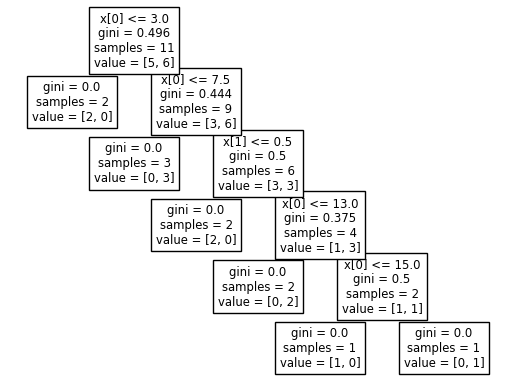

In [36]:
# Generate tree
tree.plot_tree(model)

### END OF ANALYSIS
